
# Business Problem with Customer Segmentation (RFM ANALYSIS)

An e-commerce company wants to segment its customers and determine marketing strategies according to these segments.

For this purpose, we will define the behavior of customers and we will form groups according to clustering.

In other words, we will take those who exhibit common behaviors into the same groups and we will try to develop sales and marketing techniques specific to these groups.


## Data Set Story:

https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.

The company mainly sells unique all-occasion gift-ware.

Many customers of the company are wholesalers.


## Attribute Information:

    InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
    StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
    Description: Product (item) name. Nominal.
    Quantity: The quantities of each product (item) per transaction. Numeric.
    InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
    UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
    CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
    Country: Country name. Nominal. The name of the country where a customer resides.

I have already shared the code for RFM Analysis in both Kaggle(https://www.kaggle.com/mathchi/business-problem-with-customer-segmentation) and github(https://github.com/Mathchi/Customer-Segmentation-with-RFM-Analysis) accounts. Now I tried to make this more dynamic. I hope it will be useful for everyone.

## 1. Library Loading 

In [1]:
import datetime as dt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter

pd.set_option('display.max_columns', None)

print(14 * " >", "\t n.B.a. \t", "< " * 14, "\n\n\n")

 > > > > > > > > > > > > > > 	 n.B.a. 	 < < < < < < < < < < < < < <  





## 2. Data Loading

In [2]:
df_ = pd.read_excel("C:\\Users\\gebruiker\\Desktop\\Data Science\\VBO\\vbo venv\\DSMLBC4\\202101\\HAFTA_03\\Ders Notları\\online_retail_II.xlsx",
                    sheet_name="Year 2010-2011")
df = df_.copy()

## 3. Data Preperation

In [3]:
df.dropna(inplace=True)
df = df[~df["Invoice"].str.contains("C", na=False)]
df = df[df["Quantity"] > 0]
df["TotalPrice"] = df["Quantity"] * df["Price"]


def check_df(dataframe):
    print(f"""##################### Shape #####################\n
{df.shape}\n\n
##################### Types #####################\n
{df.dtypes}\n\n
##################### Head #####################\n
{df.head(3)}\n\n
##################### NA #####################\n
{df.isnull().sum()}\n\n
##################### Quantiles #####################\n
{df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T}\n\n""")


def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    

#check_df(df)
replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "Price")

## 4. Creating RFM Segments

In [4]:
def create_rfm(dataframe):
    # Calculation of RFM Metrics
    # Attention! Frequencies for RFM nunique.

    today_date = dt.datetime(2011, 12, 11)

    rfm = dataframe.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                                'Invoice': lambda num: num.nunique(),
                                                "TotalPrice": lambda price: price.sum()})

    rfm.columns = ['recency', 'frequency', "monetary"]

    rfm = rfm[(rfm['monetary'] > 0)]


    # Calculation of RFM Scores
    rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

    # Monetary segment tanımlamada kullanılmadığı için işlemlere alınmadı.

    # Naming Segments
    rfm['rfm_segment'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)

    seg_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at_risk',
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential_loyalists',
        r'5[4-5]': 'champions'
    }

    rfm['rfm_segment'] = rfm['rfm_segment'].replace(seg_map, regex=True)
    rfm = rfm[["recency", "frequency", "monetary", "rfm_segment"]]
    return rfm


rfm = create_rfm(df)
rfm.head()

,recency,frequency,monetary,rfm_segment
Customer ID,,,,
12346.0,326,1,77183.60,hibernating
12347.0,3,7,4310.00,champions
12348.0,76,4,1797.24,at_risk
12349.0,19,1,1757.55,promising
12350.0,311,1,334.40,hibernating


## Conclusion

- After this notebook, my aim is try to further develop my other works.

- If you have any suggestions, please could you write for me? I wil be happy for comment and critics!

- Thank you for your suggestion and votes ;)

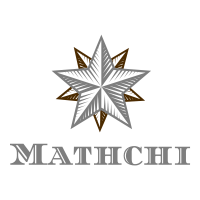

In [5]:
from IPython.display import Image
Image("C:/Users/gebruiker/Downloads/mathchi1.png")